In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Import r2_score and mean_absolute_error functions
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
#NBA season being pulled (2018-2019)
year = 2020

#URL page for scraping - NBA stats
url = "https://www.basketball-reference.com/leagues/NBA_2020_per_game.html".format(year)


html = urlopen(url)


soup = BeautifulSoup(html)

In [3]:
#use findall() to get column holders and use limit 2 because they're in the second row
soup.findAll('tr', limit=2)

#use gettext to extract the text
headers = [th.getText() for th in soup.findAll('tr', limit=2)[0].findAll('th')]

#excluding the first column because of unwanted rankings
headers = headers[1:]
headers

['Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

In [4]:
rows = soup.findAll('tr')[1:]
player_stats = [[td.getText() for td in rows[i].findAll('td')] for i in range(len(rows))]

In [5]:
stats = pd.DataFrame(player_stats, columns = headers)
stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,.592,...,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,.557,...,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,.493,...,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,.500,...,,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,.368,...,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7


In [6]:
stats.dtypes

Player    object
Pos       object
Age       object
Tm        object
G         object
GS        object
MP        object
FG        object
FGA       object
FG%       object
3P        object
3PA       object
3P%       object
2P        object
2PA       object
2P%       object
eFG%      object
FT        object
FTA       object
FT%       object
ORB       object
DRB       object
TRB       object
AST       object
STL       object
BLK       object
TOV       object
PF        object
PTS       object
dtype: object

In [7]:
stats.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [8]:
Age_integers = pd.to_numeric(stats['Age'])

Text(0, 0.5, 'Number of NBA players')

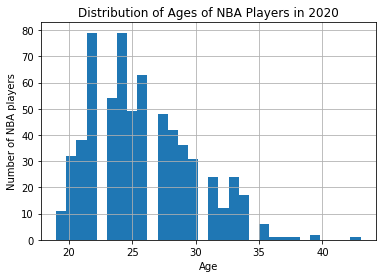

In [9]:
Age_integers.hist(bins=30)
plt.title('Distribution of Ages of NBA Players in 2020')
plt.xlabel('Age')
plt.ylabel('Number of NBA players')

# NBA SALARIES

In [10]:
salaries_url = 'https://www.basketball-reference.com/contracts/players.html'
salaries_response = requests.get(salaries_url)
page = salaries_response.text

soup = BeautifulSoup(page)

salaries = []
for x in soup.find_all('tr')[2:]:
    try:
        tds_salaries = x.find_all('td')
        name_s = tds_salaries[0].text
        salary = tds_salaries[2].text
        salaries.append([name_s, salary[1:]])
    except IndexError:
        print('This is a header!')

salaries_df = pd.DataFrame(salaries, columns=['name', 'salary'])

print(salaries_df)

This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
This is a header!
                  name      salary
0        Stephen Curry  43,006,362
1    Russell Westbrook  41,358,814
2           Chris Paul  41,358,814
3            John Wall  41,254,9

In [11]:
salaries_df.dtypes

name      object
salary    object
dtype: object

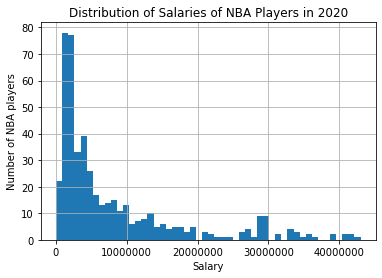

In [12]:
salaries_df['salary'] = salaries_df['salary'].apply(lambda x: x.replace(',', ''))

salaries_df_hist = pd.to_numeric(salaries_df['salary'])

salaries_df_hist.hist(bins=50)
plt.title('Distribution of Salaries of NBA Players in 2020')
plt.xlabel('Salary')
plt.ylabel('Number of NBA players')
plt.xticks(np.arange(0, 50000000, step=10000000))
plt.ticklabel_format(style = 'plain')

In [13]:
#Rename 'name' in salaries_df to 'Player'

salaries_df.rename(columns={"name": "Player"}, inplace=True)
salaries_df.columns
salaries_df['Salary_numerical'] = pd.to_numeric(salaries_df['salary'])
salaries_df = salaries_df.drop(["salary"], axis = 1)

In [14]:
stats.dtypes

Player    object
Pos       object
Age       object
Tm        object
G         object
GS        object
MP        object
FG        object
FGA       object
FG%       object
3P        object
3PA       object
3P%       object
2P        object
2PA       object
2P%       object
eFG%      object
FT        object
FTA       object
FT%       object
ORB       object
DRB       object
TRB       object
AST       object
STL       object
BLK       object
TOV       object
PF        object
PTS       object
dtype: object

In [15]:
df = pd.merge(stats,salaries_df,on='Player',how='right')

In [16]:
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary_numerical
0,Stephen Curry,PG,31,GSW,5,5,27.8,6.6,16.4,.402,...,0.8,4.4,5.2,6.6,1.0,0.4,3.2,2.2,20.8,43006362.0
1,Russell Westbrook,PG,31,HOU,57,57,35.9,10.6,22.5,.472,...,1.8,6.2,7.9,7.0,1.6,0.4,4.5,3.5,27.2,41358814.0
2,Chris Paul,PG,34,OKC,70,70,31.5,6.2,12.7,.489,...,0.4,4.6,5.0,6.7,1.6,0.2,2.3,2.3,17.6,41358814.0
3,John Wall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41254920.0
4,James Harden,SG,30,HOU,68,68,36.5,9.9,22.3,.444,...,1.0,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3,40824000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,Justin Anderson,SG,26,BRK,10,1,10.7,1.0,3.8,.263,...,0.1,2.0,2.1,0.8,0.0,0.6,0.4,1.3,2.8,125000.0
548,Troy Williams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122741.0
549,Demetrius Jackson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92857.0
550,Henry Ellenson,C,23,BRK,5,0,3.0,0.2,1.4,.143,...,0.4,0.8,1.2,0.2,0.0,0.0,0.0,0.2,0.4,50000.0


In [17]:
df.isnull().sum()

Player               0
Pos                 72
Age                 72
Tm                  72
G                   72
GS                  72
MP                  72
FG                  72
FGA                 72
FG%                 72
3P                  72
3PA                 72
3P%                 72
2P                  72
2PA                 72
2P%                 72
eFG%                72
FT                  72
FTA                 72
FT%                 72
ORB                 72
DRB                 72
TRB                 72
AST                 72
STL                 72
BLK                 72
TOV                 72
PF                  72
PTS                 72
Salary_numerical     2
dtype: int64

In [18]:
stats.shape

(677, 29)

In [19]:
salaries_df.shape

(478, 2)

# Exploratory Data Analysis

In [20]:
df["salary_log"] = np.log(df["Salary_numerical"])

In [21]:
df.shape

(552, 31)

In [22]:
#Check data types
df.dtypes

Player               object
Pos                  object
Age                  object
Tm                   object
G                    object
GS                   object
MP                   object
FG                   object
FGA                  object
FG%                  object
3P                   object
3PA                  object
3P%                  object
2P                   object
2PA                  object
2P%                  object
eFG%                 object
FT                   object
FTA                  object
FT%                  object
ORB                  object
DRB                  object
TRB                  object
AST                  object
STL                  object
BLK                  object
TOV                  object
PF                   object
PTS                  object
Salary_numerical    float64
salary_log          float64
dtype: object

In [23]:
#change all columns to float64 except Player and Position
cols = list(df.columns)
cols.remove("Player")
cols.remove("Pos")
cols.remove("Tm")
print(cols)
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Salary_numerical', 'salary_log']


In [24]:
df.dtypes

Player               object
Pos                  object
Age                 float64
Tm                   object
G                   float64
GS                  float64
MP                  float64
FG                  float64
FGA                 float64
FG%                 float64
3P                  float64
3PA                 float64
3P%                 float64
2P                  float64
2PA                 float64
2P%                 float64
eFG%                float64
FT                  float64
FTA                 float64
FT%                 float64
ORB                 float64
DRB                 float64
TRB                 float64
AST                 float64
STL                 float64
BLK                 float64
TOV                 float64
PF                  float64
PTS                 float64
Salary_numerical    float64
salary_log          float64
dtype: object

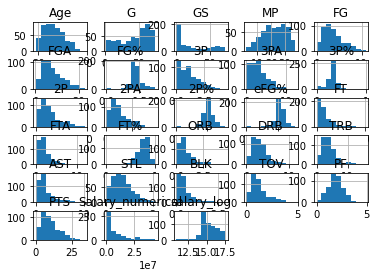

In [25]:
df.hist()
plt.show()

In [26]:
# pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(10,10))
# plt.show()

In [27]:
df.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary_numerical,salary_log
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,464.000000,...,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,5.500000e+02,550.000000
mean,25.827083,45.095833,23.206250,22.014792,3.702708,8.092292,0.453452,1.109375,3.127917,0.326483,...,3.192083,4.120833,2.159375,0.706667,0.461250,1.274167,1.930208,10.105833,8.117403e+06,15.354241
std,4.020991,20.975460,24.365801,8.354857,2.235539,4.711644,0.093202,0.886606,2.283848,0.112979,...,1.871392,2.487905,1.806008,0.403685,0.433559,0.828813,0.757250,6.272993,9.126765e+06,1.079287
min,19.000000,2.000000,0.000000,2.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+04,10.819778
25%,23.000000,29.000000,2.000000,15.800000,2.075000,4.575000,0.411000,0.400000,1.475000,0.287000,...,1.800000,2.300000,0.975000,0.400000,0.200000,0.700000,1.400000,5.500000,2.028594e+06,14.522854
50%,25.500000,51.000000,12.000000,22.700000,3.300000,7.050000,0.445500,1.000000,2.800000,0.348000,...,2.900000,3.700000,1.600000,0.700000,0.300000,1.000000,1.900000,8.800000,4.000000e+06,15.201805
75%,29.000000,62.250000,48.000000,29.000000,4.900000,10.925000,0.487250,1.600000,4.400000,0.382000,...,4.000000,5.200000,2.900000,0.900000,0.600000,1.600000,2.400000,13.275000,1.072500e+07,16.188014
max,39.000000,74.000000,73.000000,37.500000,10.900000,22.900000,0.742000,4.400000,12.400000,1.000000,...,11.400000,15.800000,10.200000,2.100000,2.900000,4.800000,4.900000,34.300000,4.300636e+07,17.576859


In [28]:
#Lowest salary is 50K, so no rows will be dropped
df.Salary_numerical.min()

50000.0

In [29]:
df.isnull().values.any()

True

In [30]:
#View the number of missing values in each column
df.isnull().sum()

Player               0
Pos                 72
Age                 72
Tm                  72
G                   72
GS                  72
MP                  72
FG                  72
FGA                 72
FG%                 72
3P                  72
3PA                 72
3P%                 88
2P                  72
2PA                 72
2P%                 74
eFG%                72
FT                  72
FTA                 72
FT%                 81
ORB                 72
DRB                 72
TRB                 72
AST                 72
STL                 72
BLK                 72
TOV                 72
PF                  72
PTS                 72
Salary_numerical     2
salary_log           2
dtype: int64

In [31]:
#Drop rows with more than 5 N/A values
df = df.dropna(thresh=5)

In [32]:
df.shape

(480, 31)

In [33]:
#Check the number of N/A values again
df.isnull().sum()

Player               0
Pos                  0
Age                  0
Tm                   0
G                    0
GS                   0
MP                   0
FG                   0
FGA                  0
FG%                  0
3P                   0
3PA                  0
3P%                 16
2P                   0
2PA                  0
2P%                  2
eFG%                 0
FT                   0
FTA                  0
FT%                  9
ORB                  0
DRB                  0
TRB                  0
AST                  0
STL                  0
BLK                  0
TOV                  0
PF                   0
PTS                  0
Salary_numerical     2
salary_log           2
dtype: int64

In [34]:
df = df.dropna(subset=['Salary_numerical'])

In [35]:
#Fill the rest N/A values with
df = df.fillna(0)


In [36]:
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary_numerical,salary_log
0,Stephen Curry,PG,31.0,GSW,5.0,5.0,27.8,6.6,16.4,0.402,...,4.4,5.2,6.6,1.0,0.4,3.2,2.2,20.8,43006362.0,17.576859
1,Russell Westbrook,PG,31.0,HOU,57.0,57.0,35.9,10.6,22.5,0.472,...,6.2,7.9,7.0,1.6,0.4,4.5,3.5,27.2,41358814.0,17.537796
2,Chris Paul,PG,34.0,OKC,70.0,70.0,31.5,6.2,12.7,0.489,...,4.6,5.0,6.7,1.6,0.2,2.3,2.3,17.6,41358814.0,17.537796
4,James Harden,SG,30.0,HOU,68.0,68.0,36.5,9.9,22.3,0.444,...,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3,40824000.0,17.524781
5,LeBron James,PG,35.0,LAL,67.0,67.0,34.6,9.6,19.4,0.493,...,6.9,7.8,10.2,1.2,0.5,3.9,1.8,25.3,39219565.0,17.484686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,Khyri Thomas,SG,23.0,DET,8.0,0.0,7.6,0.6,2.1,0.294,...,0.0,0.1,0.4,0.4,0.0,0.4,1.1,2.1,744684.0,13.520715
544,Rayjon Tucker,SG,22.0,UTA,20.0,0.0,8.1,1.0,2.2,0.465,...,0.9,1.0,0.3,0.1,0.1,0.4,0.5,3.1,340000.0,12.736701
545,Oshae Brissett,SF,21.0,TOR,19.0,0.0,7.1,0.7,1.9,0.361,...,0.9,1.4,0.4,0.2,0.1,0.4,0.9,1.9,300000.0,12.611538
547,Justin Anderson,SG,26.0,BRK,10.0,1.0,10.7,1.0,3.8,0.263,...,2.0,2.1,0.8,0.0,0.6,0.4,1.3,2.8,125000.0,11.736069


In [37]:
df.isnull().sum()

Player              0
Pos                 0
Age                 0
Tm                  0
G                   0
GS                  0
MP                  0
FG                  0
FGA                 0
FG%                 0
3P                  0
3PA                 0
3P%                 0
2P                  0
2PA                 0
2P%                 0
eFG%                0
FT                  0
FTA                 0
FT%                 0
ORB                 0
DRB                 0
TRB                 0
AST                 0
STL                 0
BLK                 0
TOV                 0
PF                  0
PTS                 0
Salary_numerical    0
salary_log          0
dtype: int64

In [38]:
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary_numerical,salary_log
0,Stephen Curry,PG,31.0,GSW,5.0,5.0,27.8,6.6,16.4,0.402,...,4.4,5.2,6.6,1.0,0.4,3.2,2.2,20.8,43006362.0,17.576859
1,Russell Westbrook,PG,31.0,HOU,57.0,57.0,35.9,10.6,22.5,0.472,...,6.2,7.9,7.0,1.6,0.4,4.5,3.5,27.2,41358814.0,17.537796
2,Chris Paul,PG,34.0,OKC,70.0,70.0,31.5,6.2,12.7,0.489,...,4.6,5.0,6.7,1.6,0.2,2.3,2.3,17.6,41358814.0,17.537796
4,James Harden,SG,30.0,HOU,68.0,68.0,36.5,9.9,22.3,0.444,...,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3,40824000.0,17.524781
5,LeBron James,PG,35.0,LAL,67.0,67.0,34.6,9.6,19.4,0.493,...,6.9,7.8,10.2,1.2,0.5,3.9,1.8,25.3,39219565.0,17.484686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,Khyri Thomas,SG,23.0,DET,8.0,0.0,7.6,0.6,2.1,0.294,...,0.0,0.1,0.4,0.4,0.0,0.4,1.1,2.1,744684.0,13.520715
544,Rayjon Tucker,SG,22.0,UTA,20.0,0.0,8.1,1.0,2.2,0.465,...,0.9,1.0,0.3,0.1,0.1,0.4,0.5,3.1,340000.0,12.736701
545,Oshae Brissett,SF,21.0,TOR,19.0,0.0,7.1,0.7,1.9,0.361,...,0.9,1.4,0.4,0.2,0.1,0.4,0.9,1.9,300000.0,12.611538
547,Justin Anderson,SG,26.0,BRK,10.0,1.0,10.7,1.0,3.8,0.263,...,2.0,2.1,0.8,0.0,0.6,0.4,1.3,2.8,125000.0,11.736069


In [39]:
df.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary_numerical,salary_log
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,...,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,4.780000e+02,478.000000
mean,25.845188,45.123431,23.299163,22.066527,3.710669,8.109623,0.453308,1.112343,3.135774,0.316238,...,3.200837,4.131381,2.165063,0.708577,0.462343,1.276569,1.934728,10.128243,8.708059e+06,15.466297
std,4.019487,20.973064,24.374189,8.330093,2.236582,4.712643,0.093215,0.886892,2.284171,0.125045,...,1.870380,2.487710,1.807593,0.403431,0.434088,0.829687,0.755030,6.275714,9.207614e+06,1.037620
min,19.000000,2.000000,0.000000,2.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+04,10.819778
25%,23.000000,29.000000,2.000000,15.825000,2.100000,4.600000,0.411250,0.400000,1.500000,0.284000,...,1.800000,2.300000,1.000000,0.400000,0.200000,0.700000,1.425000,5.500000,2.174318e+06,14.592226
50%,26.000000,51.000000,12.500000,22.800000,3.300000,7.100000,0.445500,1.000000,2.800000,0.346000,...,2.900000,3.700000,1.600000,0.700000,0.300000,1.000000,1.900000,8.850000,4.767000e+06,15.377228
75%,29.000000,62.750000,48.000000,29.000000,4.900000,10.975000,0.486750,1.600000,4.400000,0.381000,...,4.000000,5.200000,2.900000,0.900000,0.600000,1.600000,2.400000,13.425000,1.213834e+07,16.311880
max,39.000000,74.000000,73.000000,37.500000,10.900000,22.900000,0.742000,4.400000,12.400000,1.000000,...,11.400000,15.800000,10.200000,2.100000,2.900000,4.800000,4.900000,34.300000,4.300636e+07,17.576859


# Regression Analysis

In [40]:
df.corr()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary_numerical,salary_log
Age,1.000000,0.084283,0.084762,0.177026,0.074948,0.090289,-0.003935,0.179903,0.174714,0.149293,...,0.150405,0.117015,0.154923,0.097912,0.037864,0.076860,0.111749,0.095874,0.276102,0.316748
G,0.084283,1.000000,0.586005,0.501707,0.382652,0.363957,0.218820,0.291512,0.269329,0.229979,...,0.319265,0.301889,0.295650,0.317418,0.149475,0.279686,0.311468,0.378737,0.210290,0.321221
GS,0.084762,0.586005,1.000000,0.748507,0.657428,0.641607,0.164192,0.411168,0.411203,0.134756,...,0.578231,0.539658,0.497702,0.496212,0.288173,0.568386,0.517949,0.649234,0.509148,0.533637
MP,0.177026,0.501707,0.748507,1.000000,0.857036,0.868184,0.163540,0.632041,0.645436,0.266654,...,0.666025,0.605469,0.654007,0.700011,0.314807,0.743321,0.675765,0.856625,0.620497,0.691874
FG,0.074948,0.382652,0.657428,0.857036,1.000000,0.972610,0.249298,0.596976,0.605962,0.216585,...,0.659159,0.610792,0.671820,0.572714,0.318182,0.839009,0.556339,0.986248,0.694447,0.687484
FGA,0.090289,0.363957,0.641607,0.868184,0.972610,1.000000,0.075342,0.705494,0.731960,0.255961,...,0.579064,0.505419,0.710139,0.584132,0.216062,0.842623,0.509882,0.980659,0.699219,0.686190
FG%,-0.003935,0.218820,0.164192,0.163540,0.249298,0.075342,1.000000,-0.184448,-0.247230,0.007984,...,0.343355,0.426493,0.004161,0.095286,0.418723,0.143828,0.341275,0.184819,0.072253,0.137041
3P,0.179903,0.291512,0.411168,0.632041,0.596976,0.705494,-0.184448,1.000000,0.978409,0.482450,...,0.191145,0.066138,0.457784,0.364500,-0.095828,0.466951,0.256079,0.674559,0.462527,0.467442
3PA,0.174714,0.269329,0.411203,0.645436,0.605962,0.731960,-0.247230,0.978409,1.000000,0.415265,...,0.206846,0.077644,0.493412,0.388671,-0.084819,0.508914,0.270076,0.685771,0.493030,0.483738
3P%,0.149293,0.229979,0.134756,0.266654,0.216585,0.255961,0.007984,0.482450,0.415265,1.000000,...,0.017716,-0.046953,0.149746,0.131974,-0.094331,0.112308,0.096089,0.247883,0.099211,0.151179


In [41]:
df.to_csv('clean_df.csv', index=None)

In [42]:
df[['Age','2P%', 'FT%', 'PTS', 'Salary_numerical','salary_log']].head()

,Age,2P%,FT%,PTS,Salary_numerical,salary_log
0,31.0,0.636,1.000,20.8,43006362.0,17.576859
1,31.0,0.514,0.763,27.2,41358814.0,17.537796
2,34.0,0.554,0.907,17.6,41358814.0,17.537796
4,30.0,0.556,0.865,34.3,40824000.0,17.524781
5,35.0,0.564,0.693,25.3,39219565.0,17.484686


In [43]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Salary_numerical', 'salary_log'],
      dtype='object')

In [44]:
y = df["salary_log"]

#X = df.drop(['Player','salary', 'salary_log','Pos','Tm','PF','2p%','3p%'], axis=1)
X = df[['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]

In [45]:
X.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,31.0,5.0,5.0,27.8,6.6,16.4,0.402,2.4,9.8,0.245,...,1.000,0.8,4.4,5.2,6.6,1.0,0.4,3.2,2.2,20.8
1,31.0,57.0,57.0,35.9,10.6,22.5,0.472,1.0,3.7,0.258,...,0.763,1.8,6.2,7.9,7.0,1.6,0.4,4.5,3.5,27.2
2,34.0,70.0,70.0,31.5,6.2,12.7,0.489,1.6,4.3,0.365,...,0.907,0.4,4.6,5.0,6.7,1.6,0.2,2.3,2.3,17.6
4,30.0,68.0,68.0,36.5,9.9,22.3,0.444,4.4,12.4,0.355,...,0.865,1.0,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3
5,35.0,67.0,67.0,34.6,9.6,19.4,0.493,2.2,6.3,0.348,...,0.693,1.0,6.9,7.8,10.2,1.2,0.5,3.9,1.8,25.3


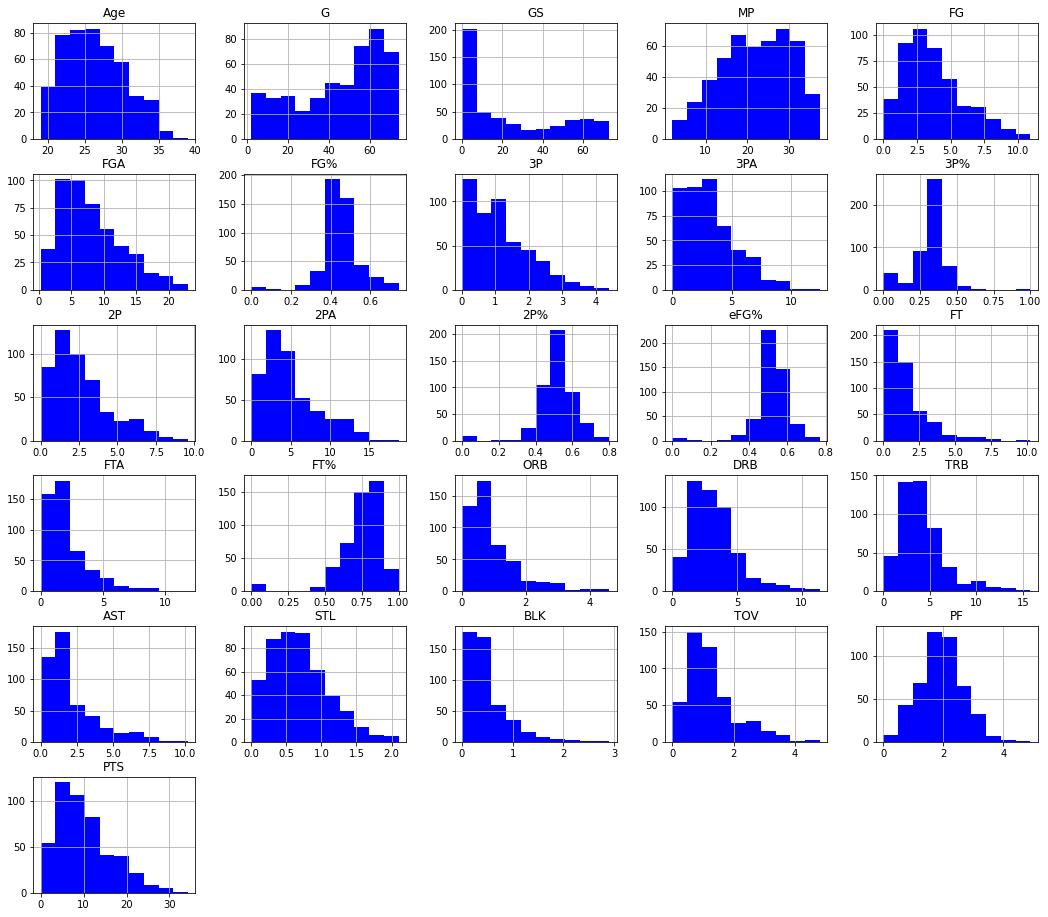

In [46]:
X.hist(figsize=(18,16), color = 'blue')
plt.show()

In [47]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

In [48]:
#make sure we have observations in each subset
print( len(X_train), len(X_test), len(y_train), len(y_test) )

382 96 382 96


In [49]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

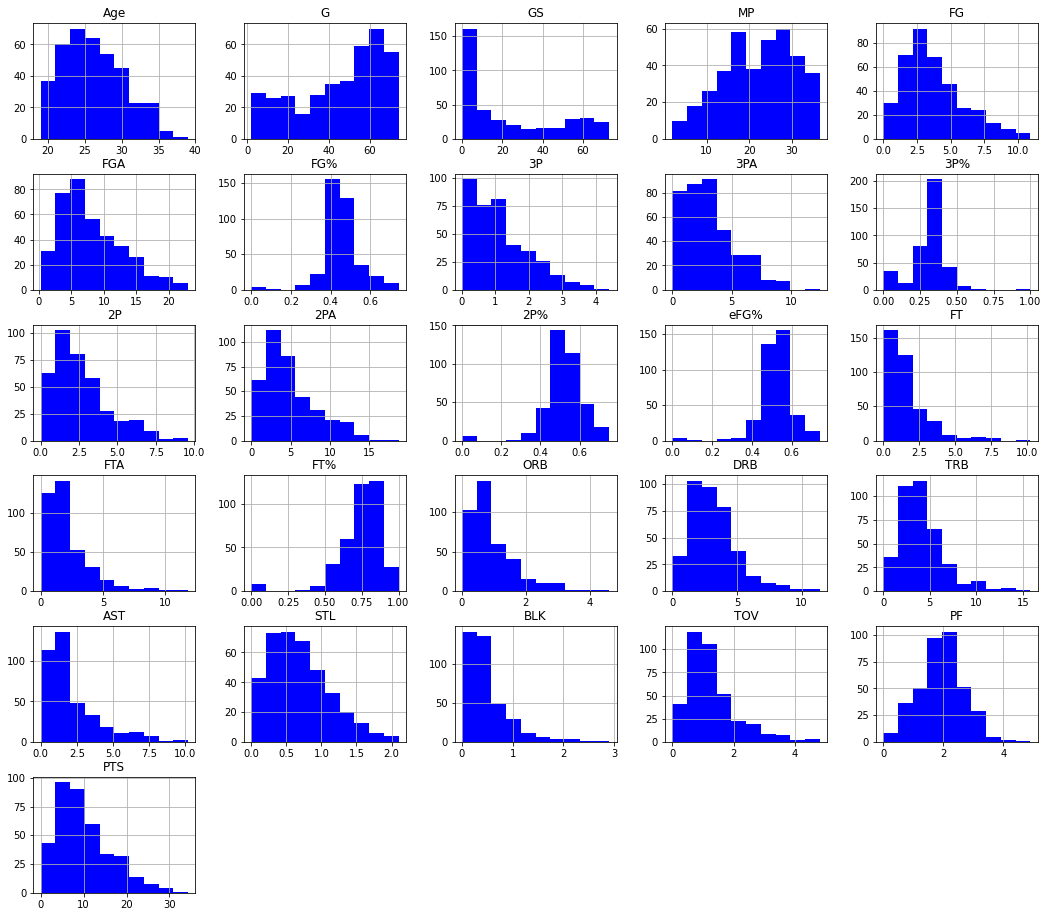

In [50]:
X_train.hist(figsize=(18,16), color = 'blue')
plt.show()

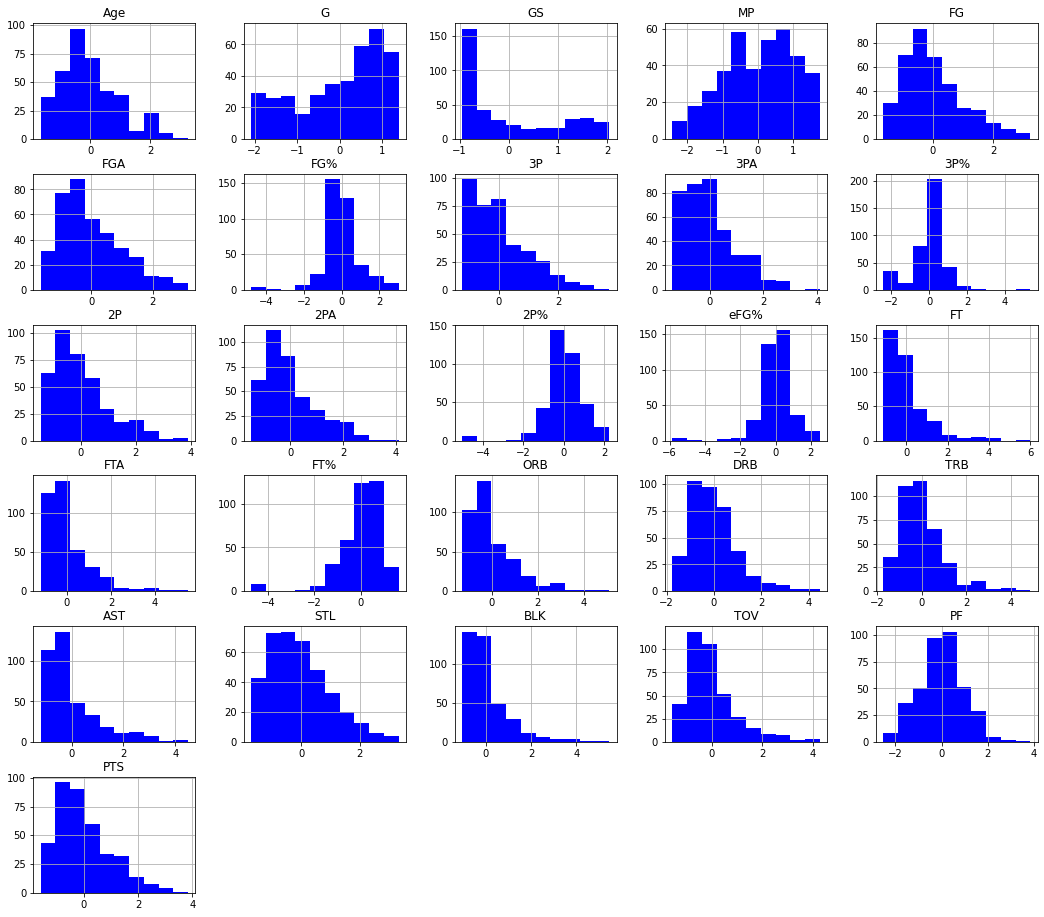

In [51]:
#Check to see if scaling worked
pd.DataFrame(X_train_scaled, columns=X.columns).hist(figsize=(18,16), color = 'blue')
plt.show()

In [52]:
pd.DataFrame(X_train).describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,382.00000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,...,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,25.71466,45.259162,23.264398,22.040576,3.698168,8.072251,0.454620,1.098691,3.117016,0.312552,...,0.743246,0.927487,3.204712,4.132984,2.143455,0.714660,0.469110,1.280105,1.944503,10.099738
std,4.07215,20.871142,24.355541,8.311969,2.232337,4.730175,0.094767,0.888346,2.274842,0.128756,...,0.157934,0.724200,1.835571,2.402112,1.796438,0.416137,0.446437,0.825430,0.771002,6.313392
min,19.00000,2.000000,0.000000,2.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.00000,30.000000,2.000000,16.000000,2.100000,4.600000,0.412000,0.400000,1.500000,0.280000,...,0.684000,0.400000,1.900000,2.400000,0.900000,0.400000,0.200000,0.700000,1.500000,5.525000
50%,25.00000,51.000000,12.000000,22.950000,3.200000,6.800000,0.446000,0.950000,2.750000,0.341000,...,0.775500,0.700000,2.900000,3.700000,1.550000,0.700000,0.300000,1.050000,1.950000,8.750000
75%,29.00000,62.000000,47.750000,28.975000,4.900000,11.000000,0.488500,1.600000,4.400000,0.379000,...,0.836000,1.200000,4.100000,5.200000,2.800000,1.000000,0.600000,1.600000,2.400000,13.500000
max,39.00000,74.000000,73.000000,36.500000,10.900000,22.900000,0.742000,4.400000,12.400000,1.000000,...,1.000000,4.600000,11.400000,15.800000,10.200000,2.100000,2.900000,4.800000,4.900000,34.300000


In [53]:
lrl = LinearRegression()
lrl.fit(X_train,y_train)
lrl.score(X_train,y_train)
pred = lrl.predict(X_test)
print(lrl.intercept_)
print("R^2 =", r2_score(y_test,pred))


# print out other coefficients
lrl.coef_

12.57518627314292
R^2 = 0.6760059452270784


array([ 5.64091148e-02, -4.35096927e-04,  1.35630194e-03,  2.72320034e-02,
        2.17621205e+00,  9.18134353e-01,  1.42364839e+00, -8.87804155e-01,
       -9.60713615e-01, -3.11693395e-01, -1.53807851e+00, -9.12213809e-01,
       -2.31871867e-01, -1.25049409e+00,  2.13968154e-01,  1.04011853e-01,
        2.76615366e-01, -2.29032717e-01, -3.05371601e-01,  3.67604666e-01,
       -8.93069690e-03,  4.11692660e-01,  1.08340783e-01,  1.68779558e-01,
       -2.12069439e-01, -3.12650508e-01])

In [54]:
X.columns

Index(['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [55]:
r2_score(y_test, pred)

0.6760059452270784

In [56]:
pred

array([14.3126368 , 16.60587652, 16.55114209, 16.49520834, 16.00481845,
       14.92345886, 14.72427317, 15.3753821 , 15.60817105, 16.99553168,
       15.71597938, 14.04461904, 14.81375923, 14.51132012, 16.75673802,
       14.2108155 , 17.66161664, 15.26603793, 14.74148331, 15.50682033,
       15.25115256, 15.40037233, 16.53252554, 14.73498891, 16.51419132,
       14.31370183, 16.31345451, 15.95635785, 15.18245644, 14.95279635,
       16.15941345, 15.06502893, 14.57733796, 15.62285002, 15.91286727,
       15.11145718, 16.66549332, 14.23746591, 16.07953319, 16.22073407,
       16.34981107, 14.60937038, 15.52504432, 14.00739547, 15.58585792,
       15.69815917, 14.61490184, 15.84814658, 15.35459021, 15.53650648,
       14.83318707, 16.13956953, 15.69467407, 15.82828037, 14.73585466,
       16.21182182, 16.34337757, 14.76026216, 14.56393624, 15.8013508 ,
       16.0059636 , 16.38312155, 16.46354683, 15.27546575, 16.29281206,
       13.96446943, 15.66032333, 15.31935484, 15.69795964, 14.66

In [57]:
y_test

518    14.184102
36     17.170638
134    16.213750
75     16.659693
81     16.592554
         ...    
143    16.119914
45     17.129697
264    15.250595
322    14.914123
317    14.951149
Name: salary_log, Length: 96, dtype: float64

In [58]:
coefs = pd.DataFrame(
    lrl.coef_,
    columns=['Coefficients'], index=X.columns
)

coefs

,Coefficients
Age,0.056409
G,-0.000435
GS,0.001356
MP,0.027232
FG,2.176212
FGA,0.918134
FG%,1.423648
3P,-0.887804
3PA,-0.960714
3P%,-0.311693


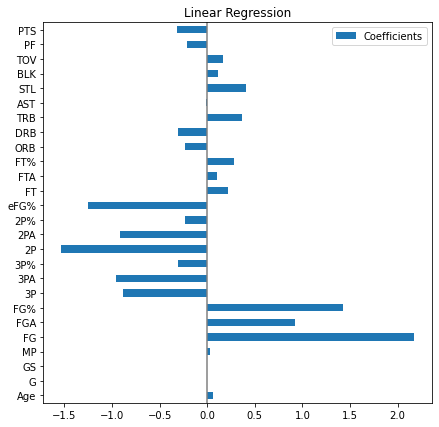

In [59]:
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Linear Regression')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)